# Proyek Analisis Data: Bike Sharing
- Nama: Andi Alfian Bahtiar
- Email: andd.fian@gmail.com
- ID Dicoding: anddfian

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap pengguna bike sharing?
- Bagaimana tren penggunaan bike sharing dalam setiap tahun, bulan, dan jam?
- Bagaimana pengaruh hari libur terhadap pengguna bike sharing?
- Bagaimana pengaruh hari kerja terhadap pengguna bike sharing?
- Bagaimana pengaruh cuaca terhadap pengguna bike sharing?
- Apa saja faktor lingkungan yang berpengaruh terhadap pengguna bike sharing?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tool Pengolahan Data:
*   Library `numpy` digunakan untuk komputasi numerik
*   Library `pandas` digunakan untuk memanipulasi dan menganalisis data

Tool Visualisasi Data:
*   Library `matplotlib` digunakan untuk membuat sebuah figure
*   Library `seaborn` digunakan untuk visualisasi data yang atraktif dan informatif.

## Data Wrangling

### Gathering Data

#### tabel day_df

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/anddfian/Dicoding-BADP/main/Submission/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membaca dataset `csv` file dari Github Repository menggunakan library `pandas`

#### tabel hour_df

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/anddfian/Dicoding-BADP/main/Submission/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Membaca dataset `csv` file dari Github Repository menggunakan library `pandas`

### Assessing Data

#### Menilai tabel day_df

##### Cek tipe data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil pengamatan pada tabel `day_df` terdapat kesalahan tipe data pada kolom `dteday` berupa `object` yang seharusnya `datetime`

##### Cek missing value

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan pada tabel `day_df` tidak terdapat missing value

##### Cek duplikasi data

In [6]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


Berdasarkan hasil pengecekan pada tabel `day_df` tidak terdapat duplikasi data

##### Cek parameter statistik

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil pengamatan pada tabel `day_df` tidak ditemukan parameter statistik yang tidak sesuai dengan kolomnya

#### Menilai tabel hour_df

##### Cek tipe data

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil pengamatan pada tabel `hour_df` terdapat kesalahan tipe data pada kolom `dteday` berupa `object` yang seharusnya `datetime`

##### Cek missing value

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan hasil pengecekan pada tabel `hour_df` tidak terdapat missing value

##### Cek duplikasi data

In [10]:
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


Berdasarkan hasil pengecekan pada tabel `hour_df` tidak terdapat duplikasi data

##### Cek parameter statistik

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan hasil pengamatan pada tabel `hour_df` tidak ditemukan parameter statistik yang tidak sesuai dengan kolomnya

### Cleaning Data

#### Membersihkan tabel day_df

##### Memperbaiki tipe data

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Memperbaiki tipe data pada tabel `day_df` kolom `dteday` menjadi `datetime` menggunakan `pandas`

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan tabel hour_df

##### Memperbaiki tipe data

In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Memperbaiki tipe data pada tabel `hour_df` kolom `dteday` menjadi `datetime` menggunakan `pandas`

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore day_df

In [16]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
659,660,2012-10-21,4,1,10,0,0,0,1,0.464167,0.456429,0.510000,0.166054,2132,4692,6824
577,578,2012-07-31,3,1,7,0,2,1,1,0.713333,0.662896,0.704167,0.165425,968,6248,7216
705,706,2012-12-06,4,1,12,0,4,1,1,0.255833,0.258204,0.508750,0.174754,340,5035,5375
92,93,2011-04-03,2,0,4,0,0,0,1,0.378333,0.378767,0.480000,0.182213,1651,1598,3249
424,425,2012-02-29,1,1,2,0,3,1,2,0.344348,0.348470,0.804783,0.179117,65,1769,1834


#### Denormalize

In [17]:
day_df["temp"] = day_df["temp"].multiply(41)
day_df["atemp"] = day_df["atemp"].multiply(50)
day_df["hum"] = day_df["hum"].multiply(100)
day_df["windspeed"] = day_df["windspeed"].multiply(67)

day_df.describe(include="all")

C:\Users\anddf\AppData\Local\Temp\ipykernel_17264\3202152416.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


Mengembalikan data aslinya sebelum di normalisasi untuk di eksplore dan di visualisasi

In [18]:
day_df.loc[day_df["season"] == 1, "season"] = "Springer"
day_df.loc[day_df["season"] == 2, "season"] = "Summer"
day_df.loc[day_df["season"] == 3, "season"] = "Fall"
day_df.loc[day_df["season"] == 4, "season"] = "Winter"

day_df.season.value_counts().sort_index()

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

In [19]:
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"

day_df.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

In [20]:
day_df.mnth.value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

In [21]:
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Not a Holiday"

day_df.holiday.value_counts().sort_index()

Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

In [22]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Mon"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Tue"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Wed"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Thu"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Fri"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sat"

day_df.weekday.value_counts().sort_index()

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

In [23]:
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Working Day"

day_df.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

In [24]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Light Snow"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_df.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

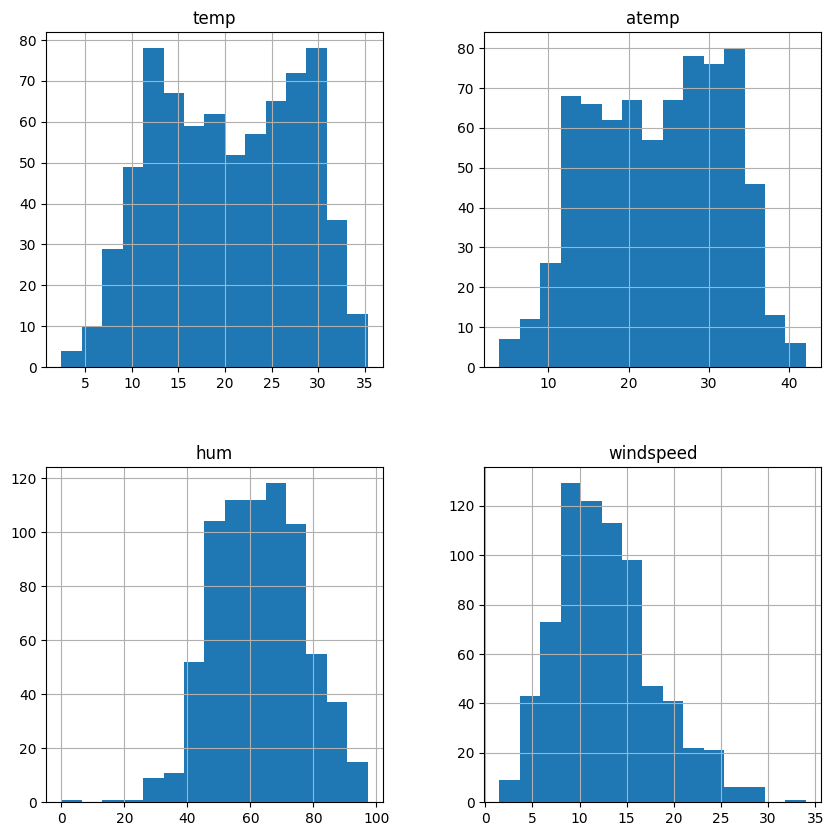

In [25]:
day_num_df = day_df[["temp", "atemp", "hum", "windspeed"]]
day_num_df.hist(bins=15, figsize=(10, 10))

Berdasarkan hasil pengamatan pada tabel `day_df` pada kolom `temp` bentuk grafik historgramnya adalah left-skewed distribution, pada kolom `atemp` bentuk grafik histogramnya adalah left-skewed distribution, pada kolom `hum` bentuk grafik histogramnya adalah right-skewed distribution, dan pada kolom `windspeed` bentuk grafik historgramnya adalah right-skewed distribution

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

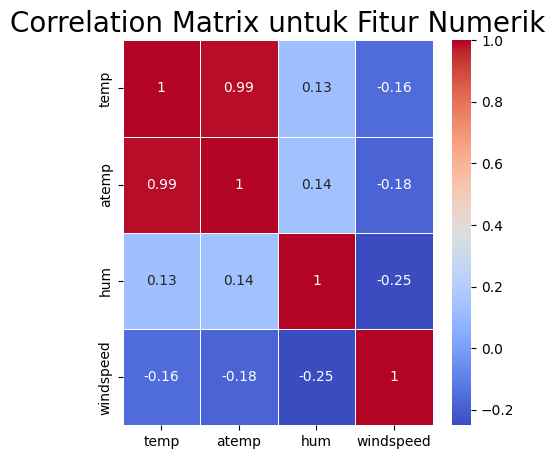

In [26]:
plt.figure(figsize = (5, 5))
correlation_matrix = day_num_df.corr().round(2)
 
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size = 20)

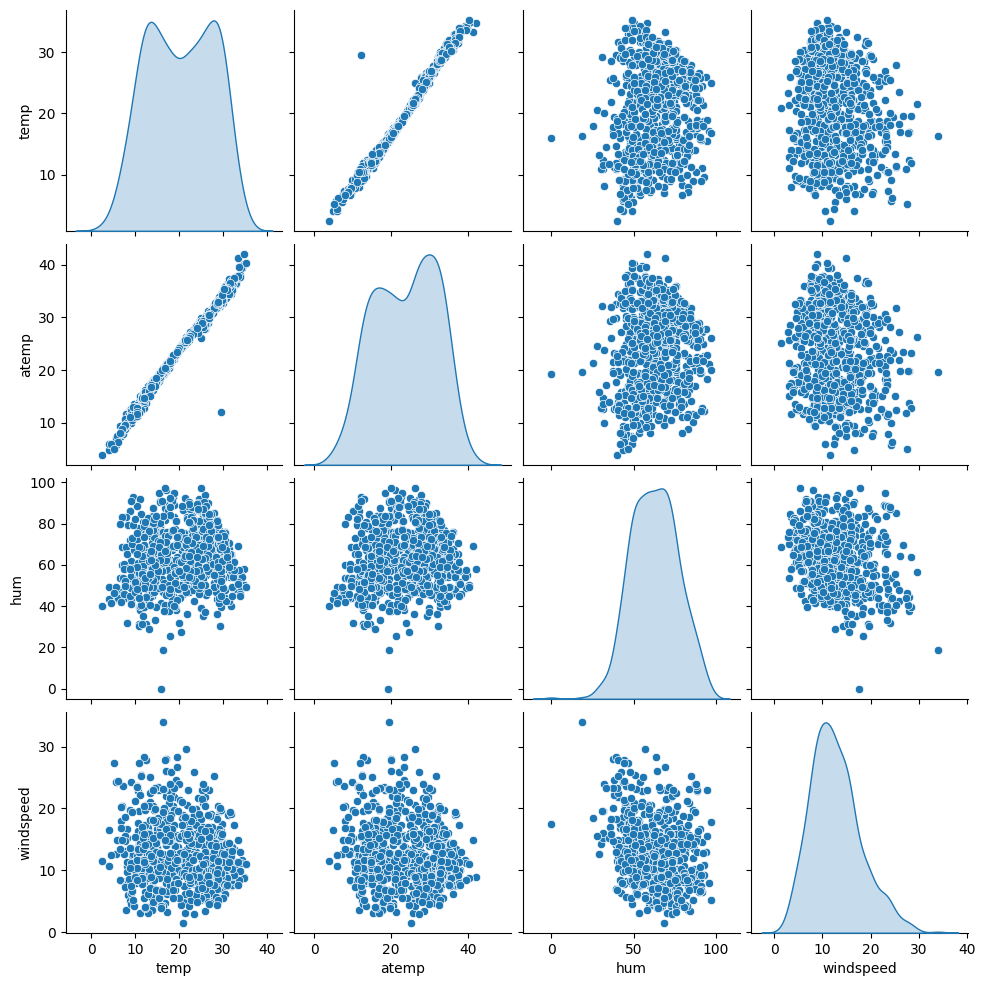

In [27]:
sns.pairplot(data=day_num_df, diag_kind="kde")

Berdasarkan hasil pengamatan pada tabel `day_df` pada kolom `temp` dan `atemp` memiliki korelasi sangat bersesuaian, pada kolom `temp` dan `hum` hampir tidak memiliki korelasi, pada kolom `temp` dan `windspeed` memiliki korelasi yang cukup berlawanan, pada kolom `atemp` dan `hum` hampir tidak memiliki korelasi, pada kolom `atemp` dan `windspeed` memiliki korelasi cukup berlawanan, pada kolom `hum` dan `windspeed` memiliki korelasi cukup berlawanan

### Explore hour_df

In [28]:
hour_df.hr.value_counts().sort_index()

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

In [29]:
hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Clear"
hour_df.loc[hour_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
hour_df.loc[hour_df["weathersit"] == 3, "weathersit"] = "Light Snow"
hour_df.loc[hour_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

hour_df.weathersit.value_counts().sort_index()

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64

## Visualization & Explanatory Analysis

### Bagaimana pengaruh musim terhadap pengguna bike sharing?

In [30]:
byseason_df = day_df.groupby(by="season").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byseason_df

,season,sum
0,Fall,188
1,Springer,181
2,Summer,184
3,Winter,178


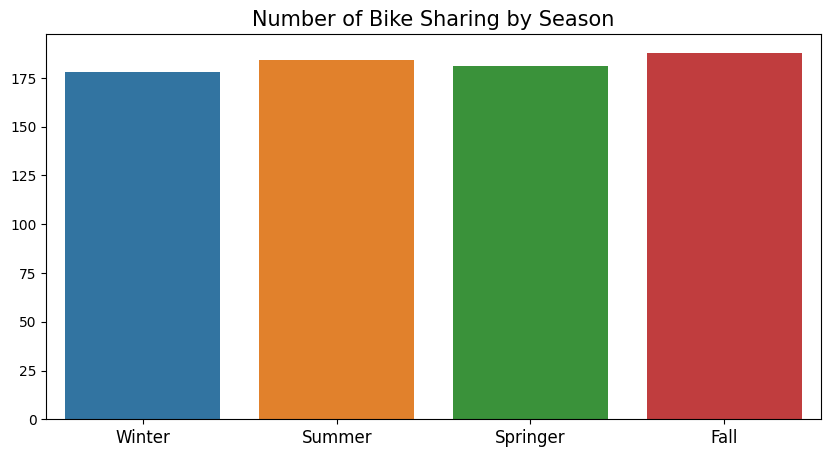

In [31]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="season",
    data=byseason_df.sort_values(by="season", ascending=False),
)
plt.title("Number of Bike Sharing by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Bagaimana tren penggunaan bike sharing dalam setiap tahun, bulan, dan jam?

#### Tahun

In [32]:
byyr_df = day_df.groupby(by="yr").instant.nunique().reset_index()
byyr_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byyr_df

,yr,sum
0,2011,365
1,2012,366


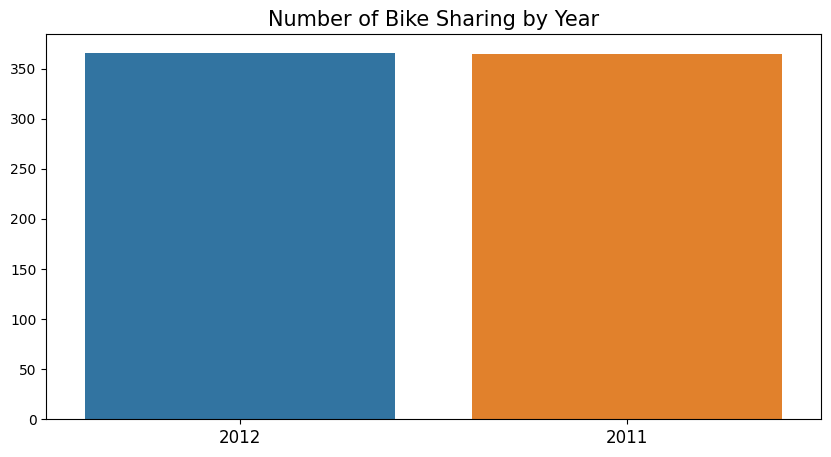

In [33]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="yr",
    data=byyr_df.sort_values(by="yr", ascending=False),
)
plt.title("Number of Bike Sharing by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

#### Bulan

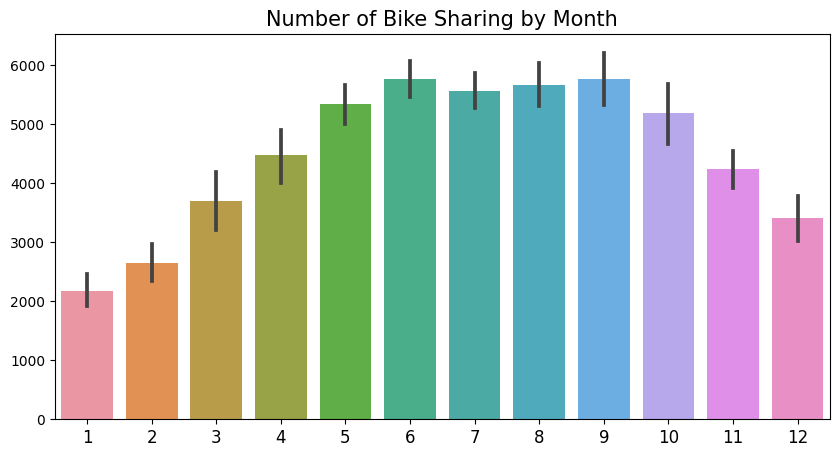

In [34]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="mnth",
    data=day_df.sort_values(by="mnth", ascending=False),
)
plt.title("Number of Bike Sharing by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

#### Jam

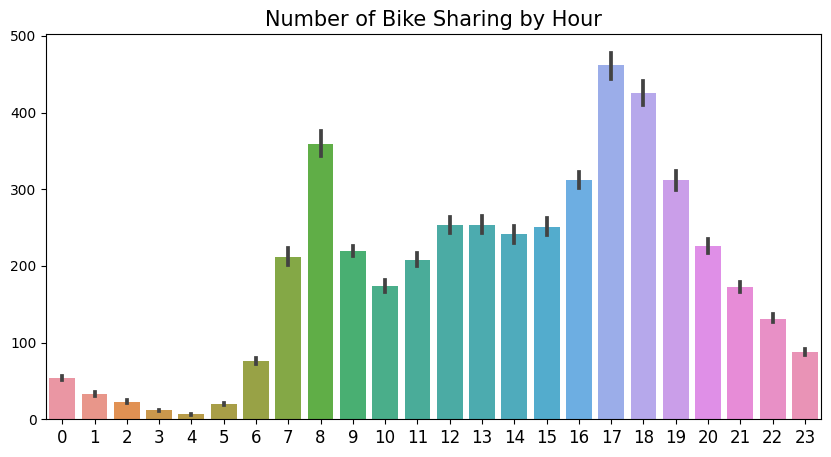

In [35]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr",
    data=hour_df.sort_values(by="hr", ascending=False),
)
plt.title("Number of Bike Sharing by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Bagaimana pengaruh hari libur terhadap pengguna bike sharing?

In [36]:
byholidyday_df = day_df.groupby(by="holiday").instant.nunique().reset_index()
byholidyday_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byholidyday_df

,holiday,sum
0,Holiday,710
1,Not a Holiday,21


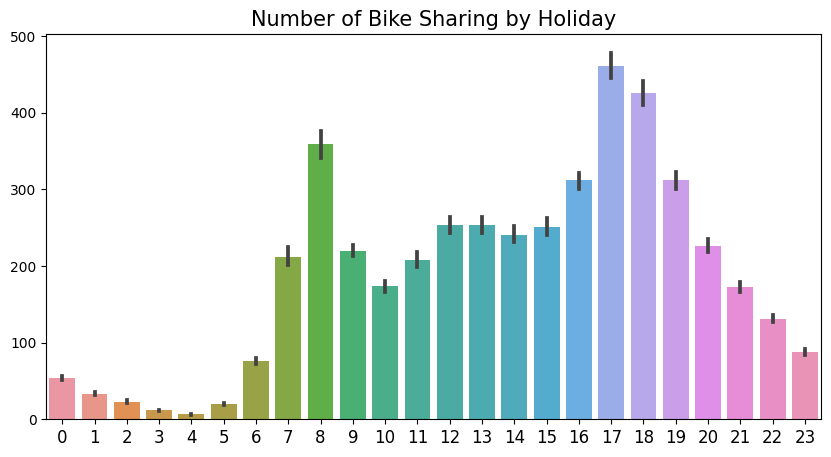

In [37]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr",
    data=hour_df.sort_values(by="hr", ascending=False),
)
plt.title("Number of Bike Sharing by Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Bagaimana pengaruh hari kerja terhadap pengguna bike sharing?

In [38]:
byworkingday_df = day_df.groupby(by="workingday").instant.nunique().reset_index()
byworkingday_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byworkingday_df

,workingday,sum
0,Holiday,231
1,Working Day,500


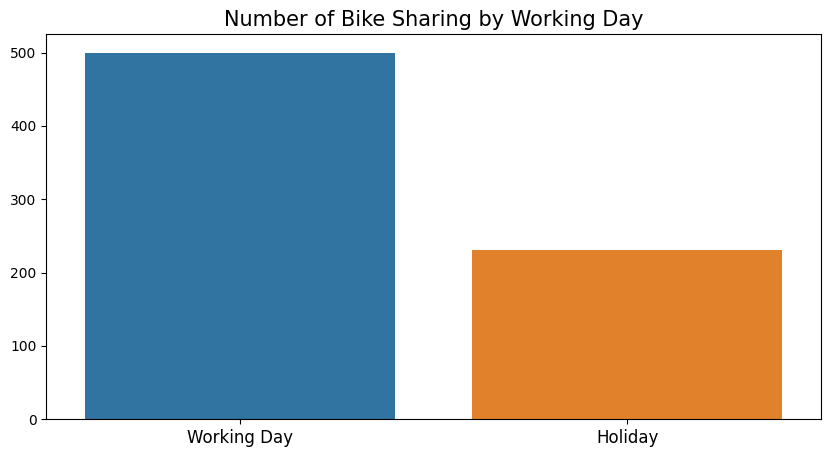

In [39]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="workingday",
    data=byworkingday_df.sort_values(by="workingday", ascending=False),
)
plt.title("Number of Bike Sharing by Working Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Bagaimana pengaruh cuaca terhadap pengguna bike sharing?

In [40]:
byweathersit_df = day_df.groupby(by="weathersit").instant.nunique().reset_index()
byweathersit_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byweathersit_df

,weathersit,sum
0,Clear,463
1,Light Snow,21
2,Mist + Cloudy,247


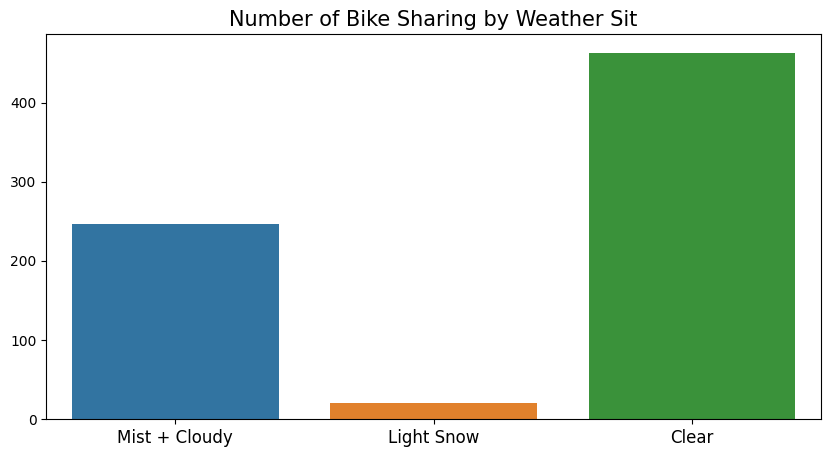

In [41]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="weathersit",
    data=byweathersit_df.sort_values(by="weathersit", ascending=False),
)
plt.title("Number of Bike Sharing by Weather Sit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Apa saja faktor lingkungan yang berpengaruh terhadap pengguna bike sharing?

#### Analisis regresi

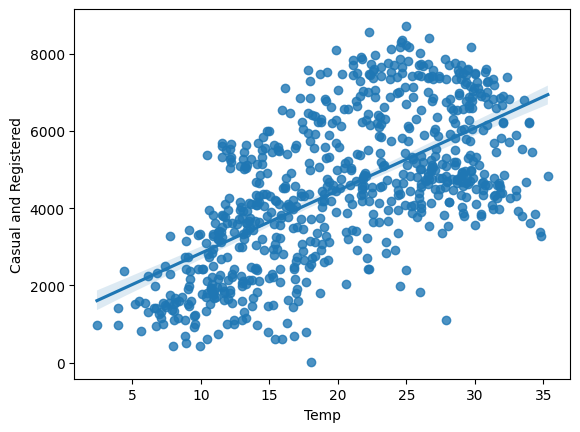

In [42]:
sns.regplot(x=day_df["temp"], y=day_df["cnt"])
plt.xlabel("Temp")
plt.ylabel("Casual and Registered")
plt.show()

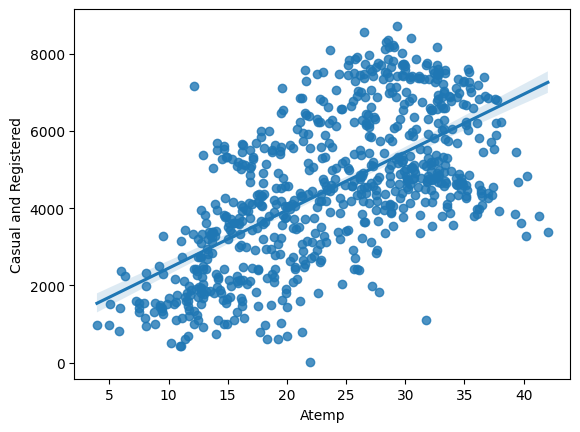

In [43]:
sns.regplot(x=day_df["atemp"], y=day_df["cnt"])
plt.xlabel("Atemp")
plt.ylabel("Casual and Registered")
plt.show()

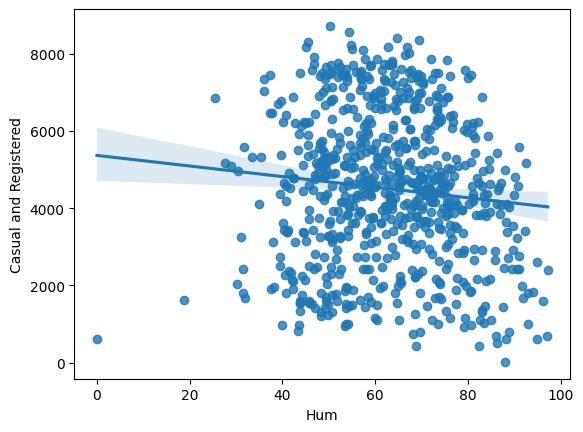

In [44]:
sns.regplot(x=day_df["hum"], y=day_df["cnt"])
plt.xlabel("Hum")
plt.ylabel("Casual and Registered")
plt.show()

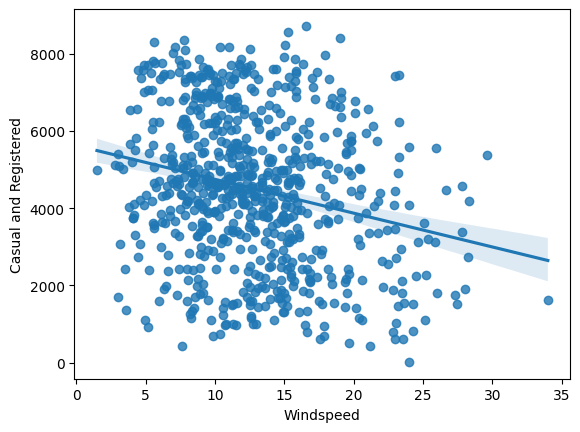

In [45]:
sns.regplot(x=day_df["windspeed"], y=day_df["cnt"])
plt.xlabel("Windspeed")
plt.ylabel("Casual and Registered")
plt.show()

Text(0.5, 0, 'Hum')

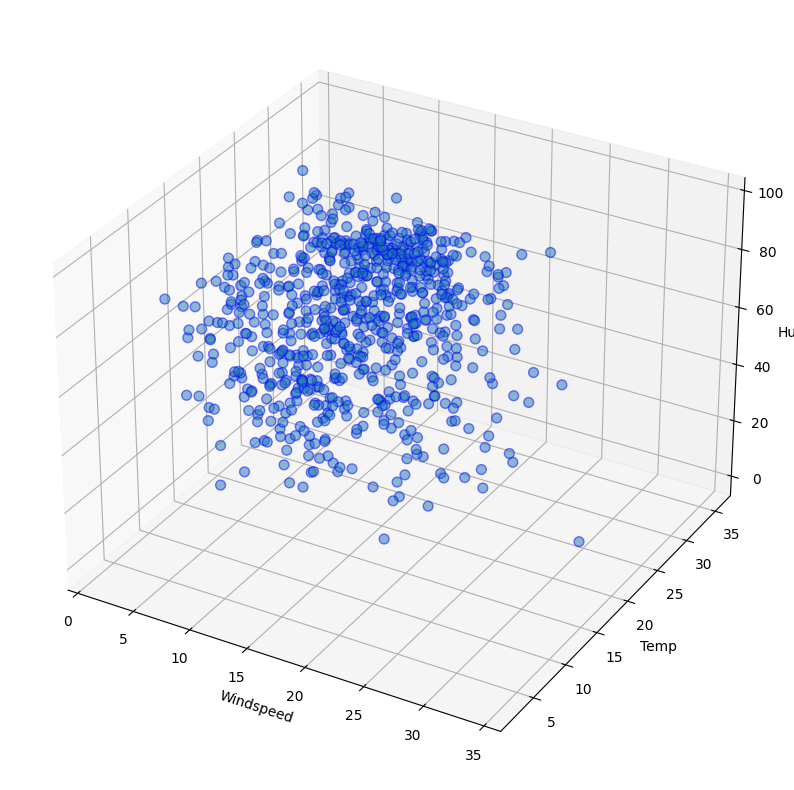

In [46]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ys = day_df['temp']
zs = day_df['hum']
xs = day_df['windspeed']
ax.scatter(xs, ys, zs, s=50, alpha=0.5, edgecolors='b')

ax.set_xlabel('Windspeed')
ax.set_ylabel('Temp')
ax.set_zlabel('Hum')

## Conclusion

- Berdasarkan hasil pengamatan pada tabel `byseason_df` pada kolom `season` dan `sum` bahwa banyak pengguna bike sharing pada musim fall. Dapat disimpulkan bahwa musim fall berpengaruh terhadap pengguna bike sharing.
- 1. Berdasarkan hasil pengamatan pada tabel `byyr_df` pada kolom `yr` dan `sum` bahwa tren pengguna bike sharing paling banyak pada tahun 2012. Dapat disimpulkan bahwa tren paling banyak pengguna bike sharing pada tahun 2012.
  2. Berdasarkan hasil pengamatan pada tabel `day_df` pada kolom `mnth` dan `cnt` bahwa tren pengguna bike sharing paling banyak pada bulan 6. Dapat disimpulkan bahwa tren paling banyak pengguna bike sharing pada bulan 6. 
  3. Berdasarkan hasil pengamatan pada tabel `hour_df` pada kolom `hour` dan `cnt` bahwa tren pengguna bike sharing paling banyak pada jam 17. Dapat disimpulkan bahwa tren paling banyak pengguna bike sharing pada jam 17.
- Berdasarkan hasil pengamatan pada tabel `byholiday_df` pada kolom `holiday` dan `sum` bahwa banyak pengguna bike sharing pada hari libur. Dapat disimpulkan bahwa hari libur berpengaruh terhadap pengguna bike sharing.
- Berdasarkan hasil pengamatan pada tabel `byworking_df` pada kolom `workingday` dan `sum` bahwa banyak pengguna bike sharing pada hari kerja. Dapat disimpulkan bahwa hari kerja berpengaruh terhadap pengguna bike sharing.
- Berdasarkan hasil pengamatan pada tabel `day_df` pada kolom `temp` dan `cnt` memiliki hubungan yang positif, pada kolom `atemp` dan `cnt` memiliki hubungan yang positif, pada kolom `hum` dan `cnt` berpengaruh jika kelembapannya diantara 40-85%, pada kolom `windspeed` dan `cnt` berpengaruh jika kecepatan anginnya diantara 3-20 knot. Dapat disimpulkan bahwa faktor lingkungan yang berpengaruh terhadap pengguna bike sharing adalah `temp`, `atemp`, `hum` dengan range 40-85% dan `windspeed` dengan range 3-20 knot.

## Export Dataset

In [47]:
day_df.to_csv("dashboard\day_clean.csv", index=False)